<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importamos los datos

X_train = pd.read_csv("./DatosAbandonoSinPondSinNanSub/X_train.csv", sep=',', decimal='.')
y_train = pd.read_csv("./DatosAbandonoSinPondSinNanSub/y_train.csv", sep=',', decimal='.')
#X_val = pd.read_csv("./DatosAbandonoSinPondSinNan/X_val.csv", sep=',', decimal='.')
#y_val = pd.read_csv("./DatosAbandonoSinPondSinNan/y_val.csv", sep=',', decimal='.')
X_test = pd.read_csv("./DatosAbandonoSinPondSinNanSub/X_test.csv", sep=',', decimal='.')
y_test = pd.read_csv("./DatosAbandonoSinPondSinNanSub/y_test.csv", sep=',', decimal='.')


features = X_train.columns

In [4]:
from sklearn import preprocessing

#scaler = preprocessing.StandardScaler().fit(X_train)
scaler = preprocessing.Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Vemos si somos capaces de mejorar los algoritmos por defecto aplicando GridSearchCV

In [5]:
start_time = time.time()

dt = DecisionTreeClassifier(random_state = 0)

gs_dt = GridSearchCV(dt,
                    param_grid = {"max_depth" : range(2, 10), 
                                  "min_samples_split": range(4, 10, 2)},
                    scoring = None,
                    cv = 5)
gs_dt.fit(X_train, y_train)
gs_dt.best_estimator_

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  14.421075344085693


In [6]:
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=6, random_state=0)

In [7]:
gs_dt.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [8]:
start_time = time.time()

rf = RandomForestClassifier(random_state=0)
gs_rf = GridSearchCV(rf,
                    param_grid = {"max_depth": range(2,6), "min_samples_split": range(4,6,2), "n_estimators": range(100, 251, 50)},
                    scoring = None,
                    cv = 5)
gs_rf.fit(X_train, y_train)

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  140.9574100971222


In [9]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_split=4, random_state=0)

In [10]:
gs_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [11]:
start_time = time.time()

et = ExtraTreesClassifier(random_state=0)
gs_et = GridSearchCV(et,
                    param_grid = {"max_depth": range(2,6), "min_samples_split": range(4,10,2), "n_estimators": range(100, 251, 50)},
                    scoring = None,
                    cv = 5)
gs_et.fit(X_train, y_train)

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  104.19593334197998


In [12]:
gs_et.best_estimator_

ExtraTreesClassifier(max_depth=5, min_samples_split=4, random_state=0)

In [13]:
gs_et.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [14]:
print("DecisionTreeClassifier best score:", gs_dt.best_score_)
print("RandomForestClassifier best score:", gs_rf.best_score_)
print("ExtraTreesClassifier best score:", gs_et.best_score_)

DecisionTreeClassifier best score: 0.6255367822688085
RandomForestClassifier best score: 0.6117107728872435
ExtraTreesClassifier best score: 0.6185399495203416


In [15]:
grid_predictions_dt = gs_dt.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_dt))
print(confusion_matrix(y_test, grid_predictions_dt))

              precision    recall  f1-score   support

         0.0       0.76      0.58      0.66      4317
         1.0       0.08      0.06      0.07       579
         2.0       0.34      0.64      0.44      1340

    accuracy                           0.54      6236
   macro avg       0.39      0.42      0.39      6236
weighted avg       0.61      0.54      0.56      6236

[[2495  352 1470]
 [ 344   33  202]
 [ 442   41  857]]


In [16]:
grid_predictions_rf = gs_rf.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_rf))
print(confusion_matrix(y_test, grid_predictions_rf))

              precision    recall  f1-score   support

         0.0       0.76      0.65      0.70      4317
         1.0       0.06      0.01      0.02       579
         2.0       0.34      0.61      0.44      1340

    accuracy                           0.58      6236
   macro avg       0.39      0.42      0.39      6236
weighted avg       0.60      0.58      0.58      6236

[[2823   92 1402]
 [ 390    6  183]
 [ 518    4  818]]


In [17]:
grid_predictions_et = gs_et.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_et))
print(confusion_matrix(y_test, grid_predictions_et))

              precision    recall  f1-score   support

         0.0       0.79      0.67      0.73      4317
         1.0       0.08      0.02      0.04       579
         2.0       0.38      0.70      0.50      1340

    accuracy                           0.62      6236
   macro avg       0.42      0.46      0.42      6236
weighted avg       0.64      0.62      0.61      6236

[[2886  144 1287]
 [ 353   13  213]
 [ 398    4  938]]


In [18]:
from joblib import dump, load
dump(gs_dt, 'gs_dt_nor.joblib') 
dump(gs_rf, 'gs_rf_nor.joblib') 
dump(gs_et, 'gs_et_nor.joblib') 
dump(scaler, 'scaler_nor.joblib') 

['scaler_nor.joblib']

### Decision Tree Classifier

In [19]:
start_time = time.time()

dt = DecisionTreeClassifier(
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 6,
    max_features = None,
    max_leaf_nodes = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 6,
    min_weight_fraction_leaf = 0.0,
    random_state =  0,
    splitter = 'best')

dt_score = cross_val_score(dt, X_train, y_train, cv = 5).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", dt_score)

Tiempo:  0.6563515663146973
Score:  0.6255367822688085


In [20]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=6, random_state=0)

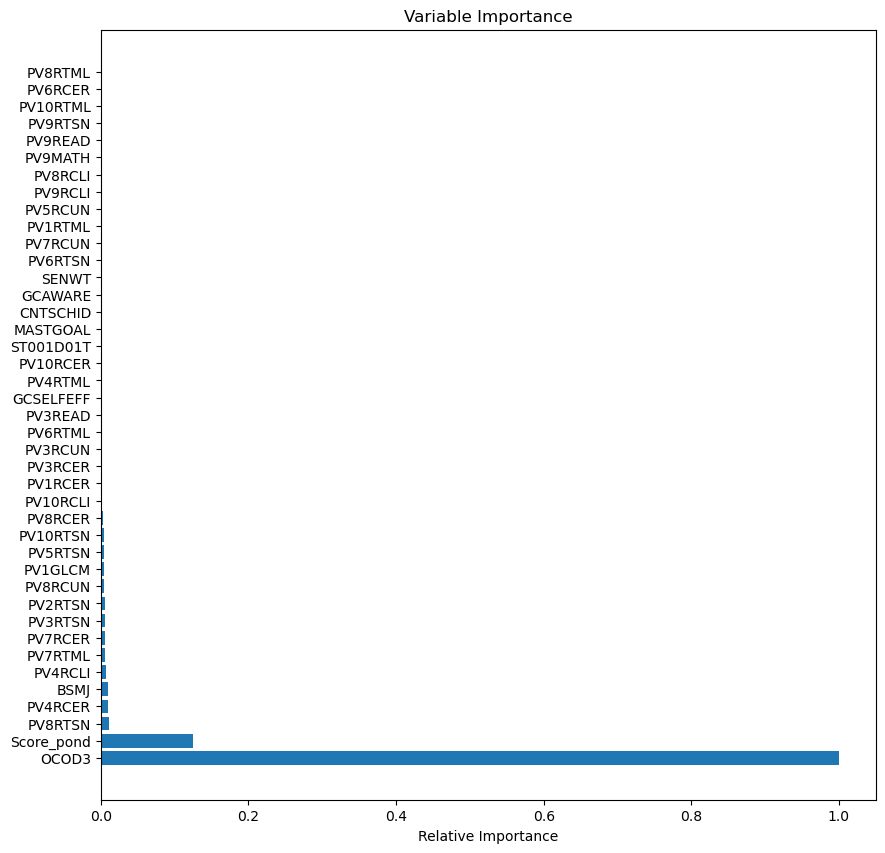

In [21]:
importances = dt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Esto es normal que ocurra porque el árbol de decisión no tiene encuenta nuestra variable para formar el árbol

### Random Forest Classifier

In [22]:
start_time = time.time()

#rf = RandomForestClassifier(max_depth=5, min_samples_split=4, random_state=0) 
rf = RandomForestClassifier(
    bootstrap = True,
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 5,
    max_features = 'sqrt',
    max_leaf_nodes = None,
    max_samples = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 4,
    min_weight_fraction_leaf = 0.0,
    n_estimators =  100,
    n_jobs = None,
    oob_score = False,
    random_state = 0,
    verbose = 0,
    warm_start = False)

rf_score = cross_val_score(rf, X_train, y_train, cv = 10).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", rf_score)

Tiempo:  14.036729097366333
Score:  0.6104873294346979


In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=4, random_state=0)

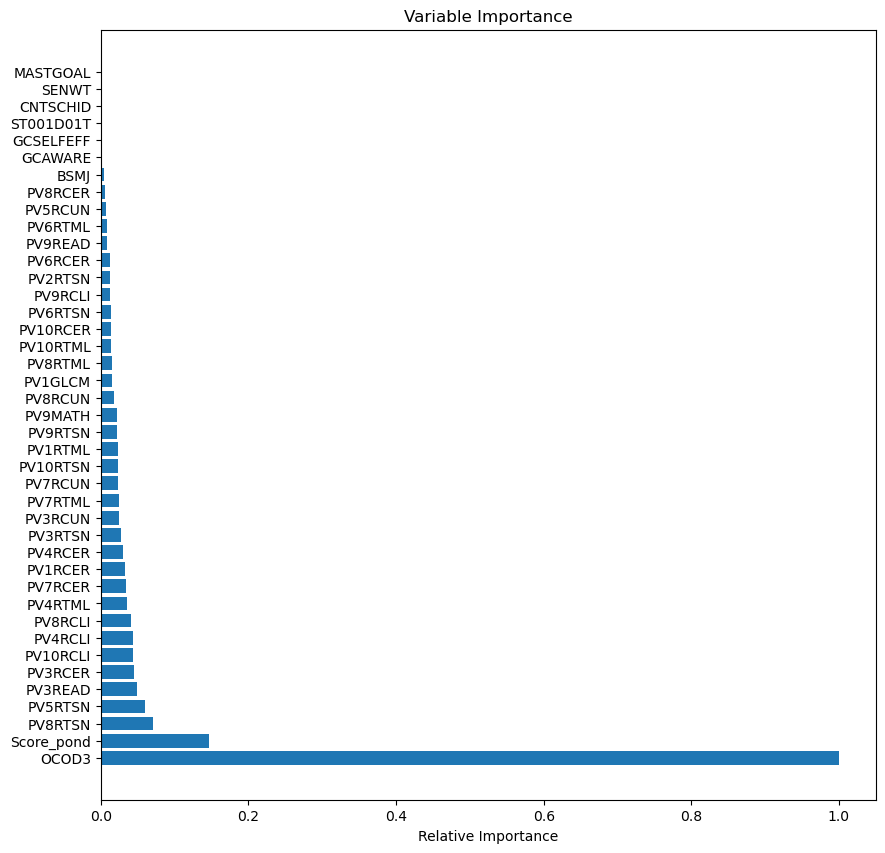

In [24]:
importances = rf.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [25]:
valores = list(zip(importances[indices], features[indices]))

def clave_ordenacion(tupla):
  return (-tupla[0], tupla[1])

sorted(valores, key=clave_ordenacion)

[(1.0, 'OCOD3'),
 (0.1460678775185774, 'Score_pond'),
 (0.07041140594190294, 'PV8RTSN'),
 (0.05920762259878694, 'PV5RTSN'),
 (0.049438786147968684, 'PV3READ'),
 (0.044825286077800036, 'PV3RCER'),
 (0.04417414894549946, 'PV10RCLI'),
 (0.04366389889912706, 'PV4RCLI'),
 (0.040774124655747174, 'PV8RCLI'),
 (0.03539772142289307, 'PV4RTML'),
 (0.034001071483187637, 'PV7RCER'),
 (0.03291150012873966, 'PV1RCER'),
 (0.03015157304939744, 'PV4RCER'),
 (0.027012727297423166, 'PV3RTSN'),
 (0.024808280507694545, 'PV3RCUN'),
 (0.0241858501902934, 'PV7RTML'),
 (0.023890882149796767, 'PV7RCUN'),
 (0.023040729911931682, 'PV10RTSN'),
 (0.023024148503548017, 'PV1RTML'),
 (0.022061010324351957, 'PV9RTSN'),
 (0.022052067975554937, 'PV9MATH'),
 (0.018076783982013414, 'PV8RCUN'),
 (0.015581035859708358, 'PV1GLCM'),
 (0.015343830744705737, 'PV8RTML'),
 (0.013973658075804802, 'PV10RTML'),
 (0.013507224260971755, 'PV10RCER'),
 (0.013224137079530709, 'PV6RTSN'),
 (0.013031672247392155, 'PV9RCLI'),
 (0.01205010486

### Extra Trees Classifier

In [26]:
start_time = time.time()

et = ExtraTreesClassifier( 
    bootstrap = False,
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 5,
    max_features = 'sqrt',
    max_leaf_nodes = None,
    max_samples = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 4,
    min_weight_fraction_leaf = 0.0,
    n_estimators =  100,
    n_jobs = None,
    oob_score = False,
    random_state = 0,
    verbose = 0,
    warm_start = False)
 

et_score = cross_val_score(et, X_train, y_train, cv = 10).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", et_score)

Tiempo:  2.7105674743652344
Score:  0.6237318605154862


In [27]:
et.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=5, min_samples_split=4, random_state=0)

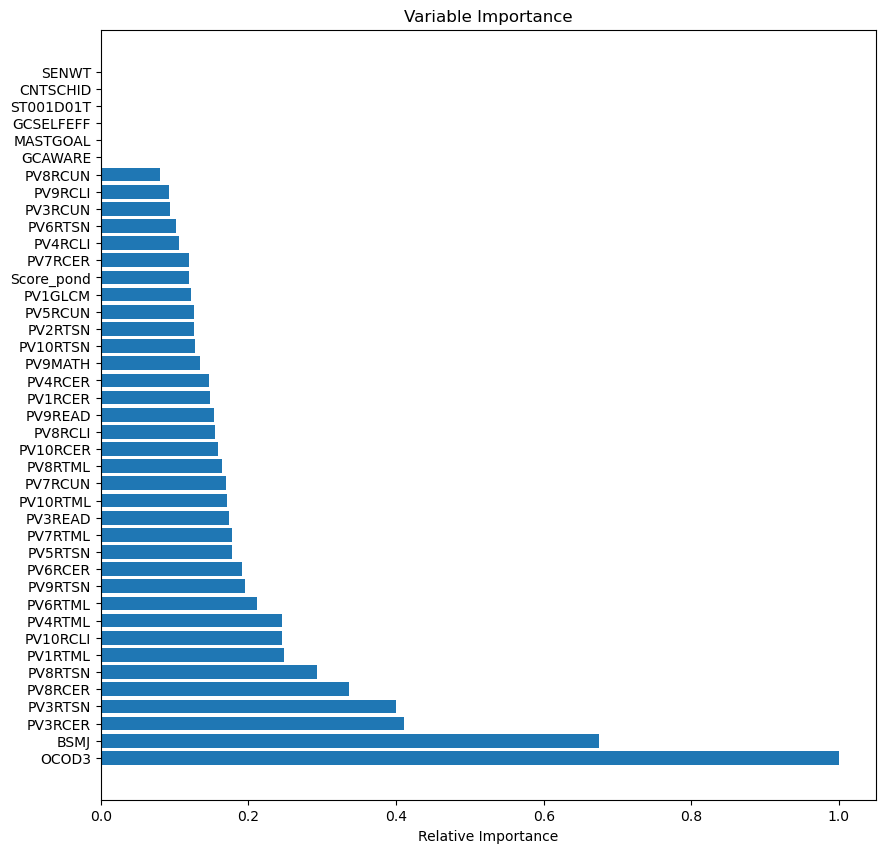

In [28]:
importances = et.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [29]:
valores = list(zip(importances[indices], features[indices]))

def clave_ordenacion(tupla):
  return (-tupla[0], tupla[1])

sorted(valores, key=clave_ordenacion)

[(1.0, 'OCOD3'),
 (0.6750489946024163, 'BSMJ'),
 (0.41028832510606056, 'PV3RCER'),
 (0.3993095982960691, 'PV3RTSN'),
 (0.33638496262184636, 'PV8RCER'),
 (0.2928098444362623, 'PV8RTSN'),
 (0.24817944238718248, 'PV1RTML'),
 (0.24565621499688978, 'PV10RCLI'),
 (0.24491712987159076, 'PV4RTML'),
 (0.21211550068039578, 'PV6RTML'),
 (0.1949454132015408, 'PV9RTSN'),
 (0.19156255292586447, 'PV6RCER'),
 (0.17742380428335675, 'PV5RTSN'),
 (0.17726315904559145, 'PV7RTML'),
 (0.17411413478466758, 'PV3READ'),
 (0.17158969708632374, 'PV10RTML'),
 (0.16995536832204858, 'PV7RCUN'),
 (0.16460951595864745, 'PV8RTML'),
 (0.15879164682378608, 'PV10RCER'),
 (0.1549803163111197, 'PV8RCLI'),
 (0.1527050169671783, 'PV9READ'),
 (0.14743570107594783, 'PV1RCER'),
 (0.1462116871183355, 'PV4RCER'),
 (0.1339276839513815, 'PV9MATH'),
 (0.1271260625803456, 'PV10RTSN'),
 (0.12686908841529257, 'PV2RTSN'),
 (0.12586270203600067, 'PV5RCUN'),
 (0.12278551170966395, 'PV1GLCM'),
 (0.12004225763913087, 'Score_pond'),
 (0.1195

In [30]:
from joblib import dump, load
dump(dt, 'dt_nor.joblib') 
dump(rf, 'rf_nor.joblib') 
dump(et, 'et_nor.joblib') 
dump(scaler, 'scaler_nor.joblib') 

['scaler_nor.joblib']

In [31]:
#!pip install pipreqs

In [32]:
#!pip freeze > requirements.txt

In [33]:
#!pip freeze 

In [34]:
""" %%writefile requirements.txt

apache-beam[gcp]==2.24.0
tensorflow
gensim==3.6.0
fsspec==0.8.4
gcsfs==0.7.1
numpy==1.20.0 """

' %%writefile requirements.txt\n\napache-beam[gcp]==2.24.0\ntensorflow\ngensim==3.6.0\nfsspec==0.8.4\ngcsfs==0.7.1\nnumpy==1.20.0 '

In [35]:
#!pip install -r requirements.txt